In [69]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [70]:
data = pd.read_csv('xAPI-Edu-Data.csv')
data.head()


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [71]:
data.isnull().sum()


gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [72]:
data['GradeID'].dtype


dtype('O')

In [73]:
for i in data.columns:
    if data[i].dtype == 'O':
        print(f'{i} : {data[i].unique()}')
        

gender : ['M' 'F']
NationalITy : ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
PlaceofBirth : ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
StageID : ['lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID : ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID : ['A' 'B' 'C']
Topic : ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
Semester : ['F' 'S']
Relation : ['Father' 'Mum']
ParentAnsweringSurvey : ['Yes' 'No']
ParentschoolSatisfaction : ['Good' 'Bad']
StudentAbsenceDays : ['Under-7' 'Above-7']
Class : ['M' 'L' 'H']


In [74]:
data.head(2)


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M


In [75]:
data.shape


(480, 17)

In [76]:
data['gender'].value_counts()


M    305
F    175
Name: gender, dtype: int64

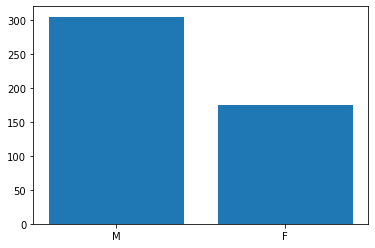

In [77]:
plt.bar(data = data['gender'].value_counts(),x=data['gender'].value_counts().index,
        height=data['gender'].value_counts().values);


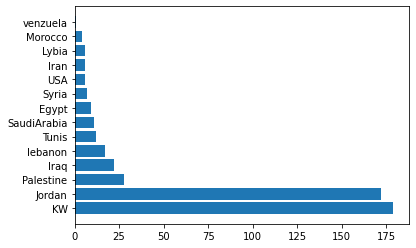

In [78]:
plt.barh(data = data['NationalITy'].value_counts(),y = data['NationalITy'].value_counts().index,
        width = data['NationalITy'].value_counts().values);


In [79]:
data['NationalITy'].value_counts()


KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

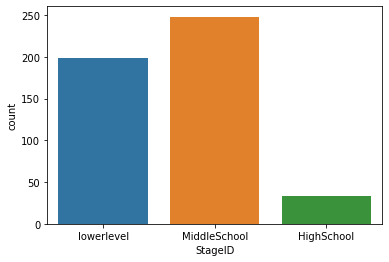

In [80]:
sns.countplot(data = data, x = data['StageID']);


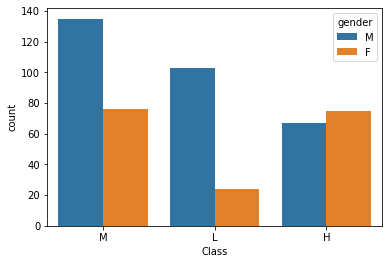

In [81]:
sns.countplot(data = data, x = data['Class'], hue = data['gender']);


<AxesSubplot:xlabel='SectionID', ylabel='count'>

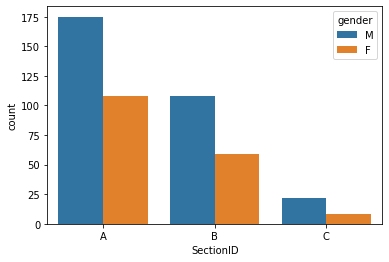

In [82]:
sns.countplot(data = data, x = data['SectionID'], hue = data['gender'])


In [89]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [90]:
categorical_cols, numerical_cols


(['gender',
  'NationalITy',
  'PlaceofBirth',
  'StageID',
  'GradeID',
  'SectionID',
  'Topic',
  'Semester',
  'Relation',
  'ParentAnsweringSurvey',
  'ParentschoolSatisfaction',
  'StudentAbsenceDays',
  'Class'],
 ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'])

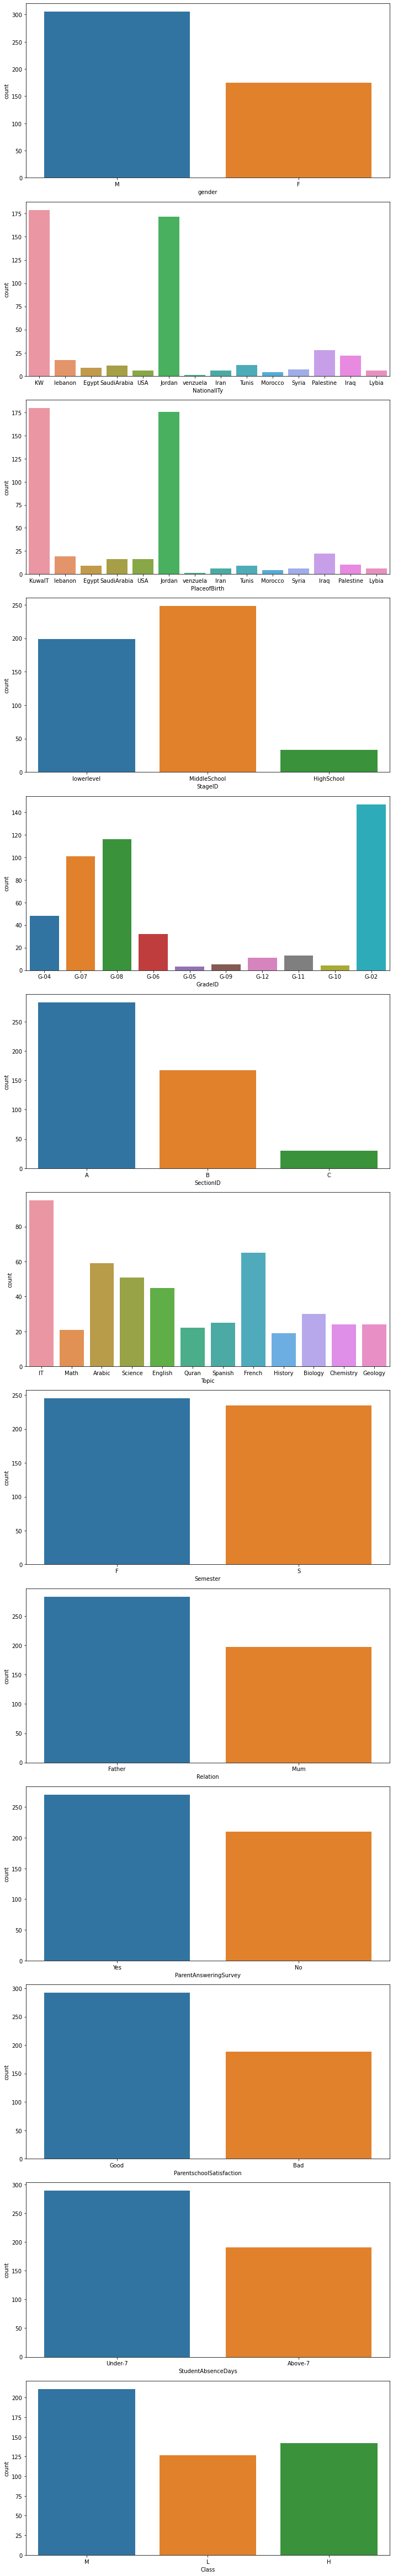

In [91]:
fig, ax = plt.subplots(len(categorical_cols), 1, figsize=(10, len(categorical_cols)*5))
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=data, ax=ax[i])

plt.tight_layout()
plt.show()


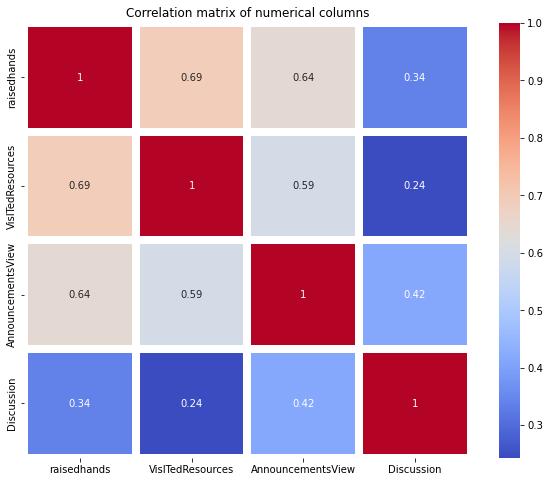

In [95]:
corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',linewidths= 8)
plt.title("Correlation matrix of numerical columns")
plt.show()


In [96]:
len(categorical_cols), len(numerical_cols)


(13, 4)

In [98]:
from sklearn.preprocessing import LabelEncoder

encoder_data = data.copy()
le = LabelEncoder()
for col in categorical_cols:
    encoder_data[col] = le.fit_transform(encoder_data[col])

dummies_data = pd.get_dummies(data, columns=categorical_cols)


In [99]:
encoder_data


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,3,3,1,5,0,2,1,0,5,4,5,8,0,0,0,1
476,0,3,3,1,5,0,5,0,0,50,77,14,28,0,0,1,2
477,0,3,3,1,5,0,5,1,0,55,74,25,29,0,0,1,2
478,0,3,3,1,5,0,6,0,0,30,17,14,57,0,0,0,1


In [100]:
dummies_data


,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7,Class_H,Class_L,Class_M
0,15,16,2,20,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,20,20,3,25,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
2,10,7,0,30,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
3,30,25,5,35,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,40,50,12,50,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,1,0,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
476,50,77,14,28,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
477,55,74,25,29,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
478,30,17,14,57,1,0,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0


In [102]:
from sklearn.model_selection import train_test_split

X_encoder = encoder_data.drop('Class', axis=1)
X_dummies = dummies_data.drop(['Class_H','Class_L','Class_M'], axis=1)

y_encoder = encoder_data['Class']
y_dummies = dummies_data[['Class_H','Class_L','Class_M']]

X_train_encoder, X_test_encoder, y_train_encoder, y_test_encoder = train_test_split(X_encoder, y_encoder,
                                                                                    test_size=.2, random_state=42)
X_train_dummies, X_test_dummies, y_train_dummies, y_test_dummies = train_test_split(X_dummies, y_dummies, 
                                                                                    test_size=.2, random_state=42)



In [105]:
print(f'{X_train_encoder.shape, X_test_encoder.shape, y_train_encoder.shape, y_test_encoder.shape}')
print(f'{X_train_dummies.shape, X_test_dummies.shape, y_train_dummies.shape, y_test_dummies.shape}')


((384, 16), (96, 16), (384,), (96,))
((384, 72), (96, 72), (384, 3), (96, 3))


In [137]:
from sklearn.tree import DecisionTreeClassifier

dt_encoder = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_dummies = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_encoder.fit(X_train_encoder, y_train_encoder)
dt_dummies.fit(X_train_dummies, y_train_dummies)

y_pred_encoder = dt_encoder.predict(X_test_encoder)
y_pred_dummies = dt_dummies.predict(X_test_dummies)

from sklearn.metrics import accuracy_score, confusion_matrix

print('accuracy of decision tree using label encoder %.2f' %accuracy_score(y_test_encoder, y_pred_encoder))
print('accuracy of decision tree using dummies/OneHot %.2f' %accuracy_score(y_test_dummies, y_pred_dummies))
print('----------------------------------------------')
print('encoder confusion matrix\n', confusion_matrix(y_test_encoder, y_pred_encoder))

import numpy as np

y_test_dummies_single = np.argmax(y_test_dummies.values, axis=1)
y_pred_dummies_single = np.argmax(y_pred_dummies, axis=1)

print('dummies confusion tree\n', confusion_matrix(y_test_dummies_single, y_pred_dummies_single))



accuracy of decision tree using label encoder 0.80
accuracy of decision tree using dummies/OneHot 0.74
----------------------------------------------
encoder confusion matrix
 [[19  0  3]
 [ 0 22  4]
 [ 9  3 36]]
dummies confusion tree
 [[19  0  3]
 [ 0 22  4]
 [ 9  3 36]]


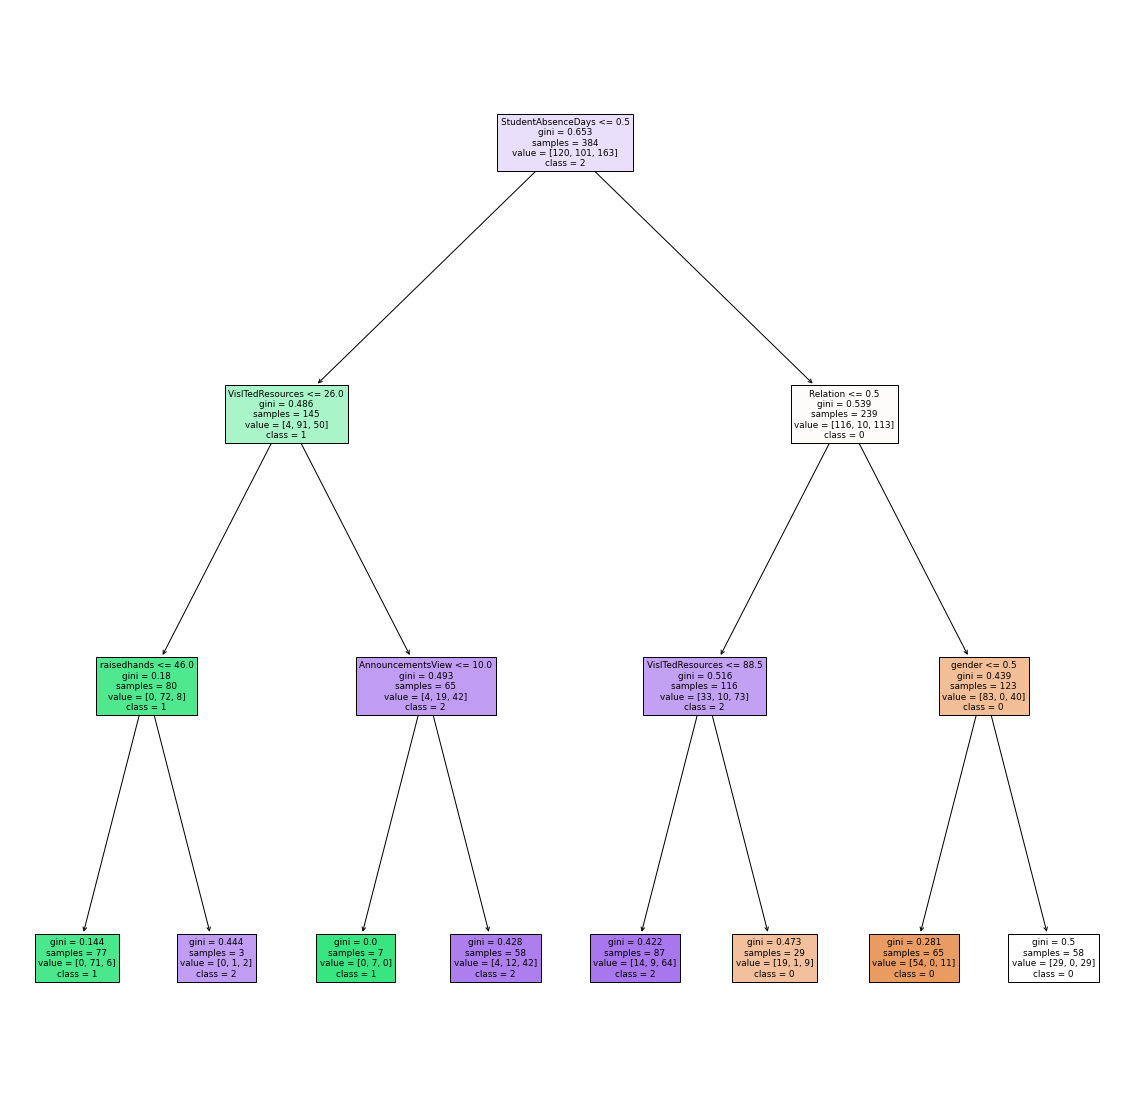

In [138]:
from sklearn.metrics import plot_confusion_matrix

plt.figure(figsize=(20,20))
plot_tree(dt_encoder, feature_names=X_encoder.columns, class_names=['0','1','2'], filled=True);


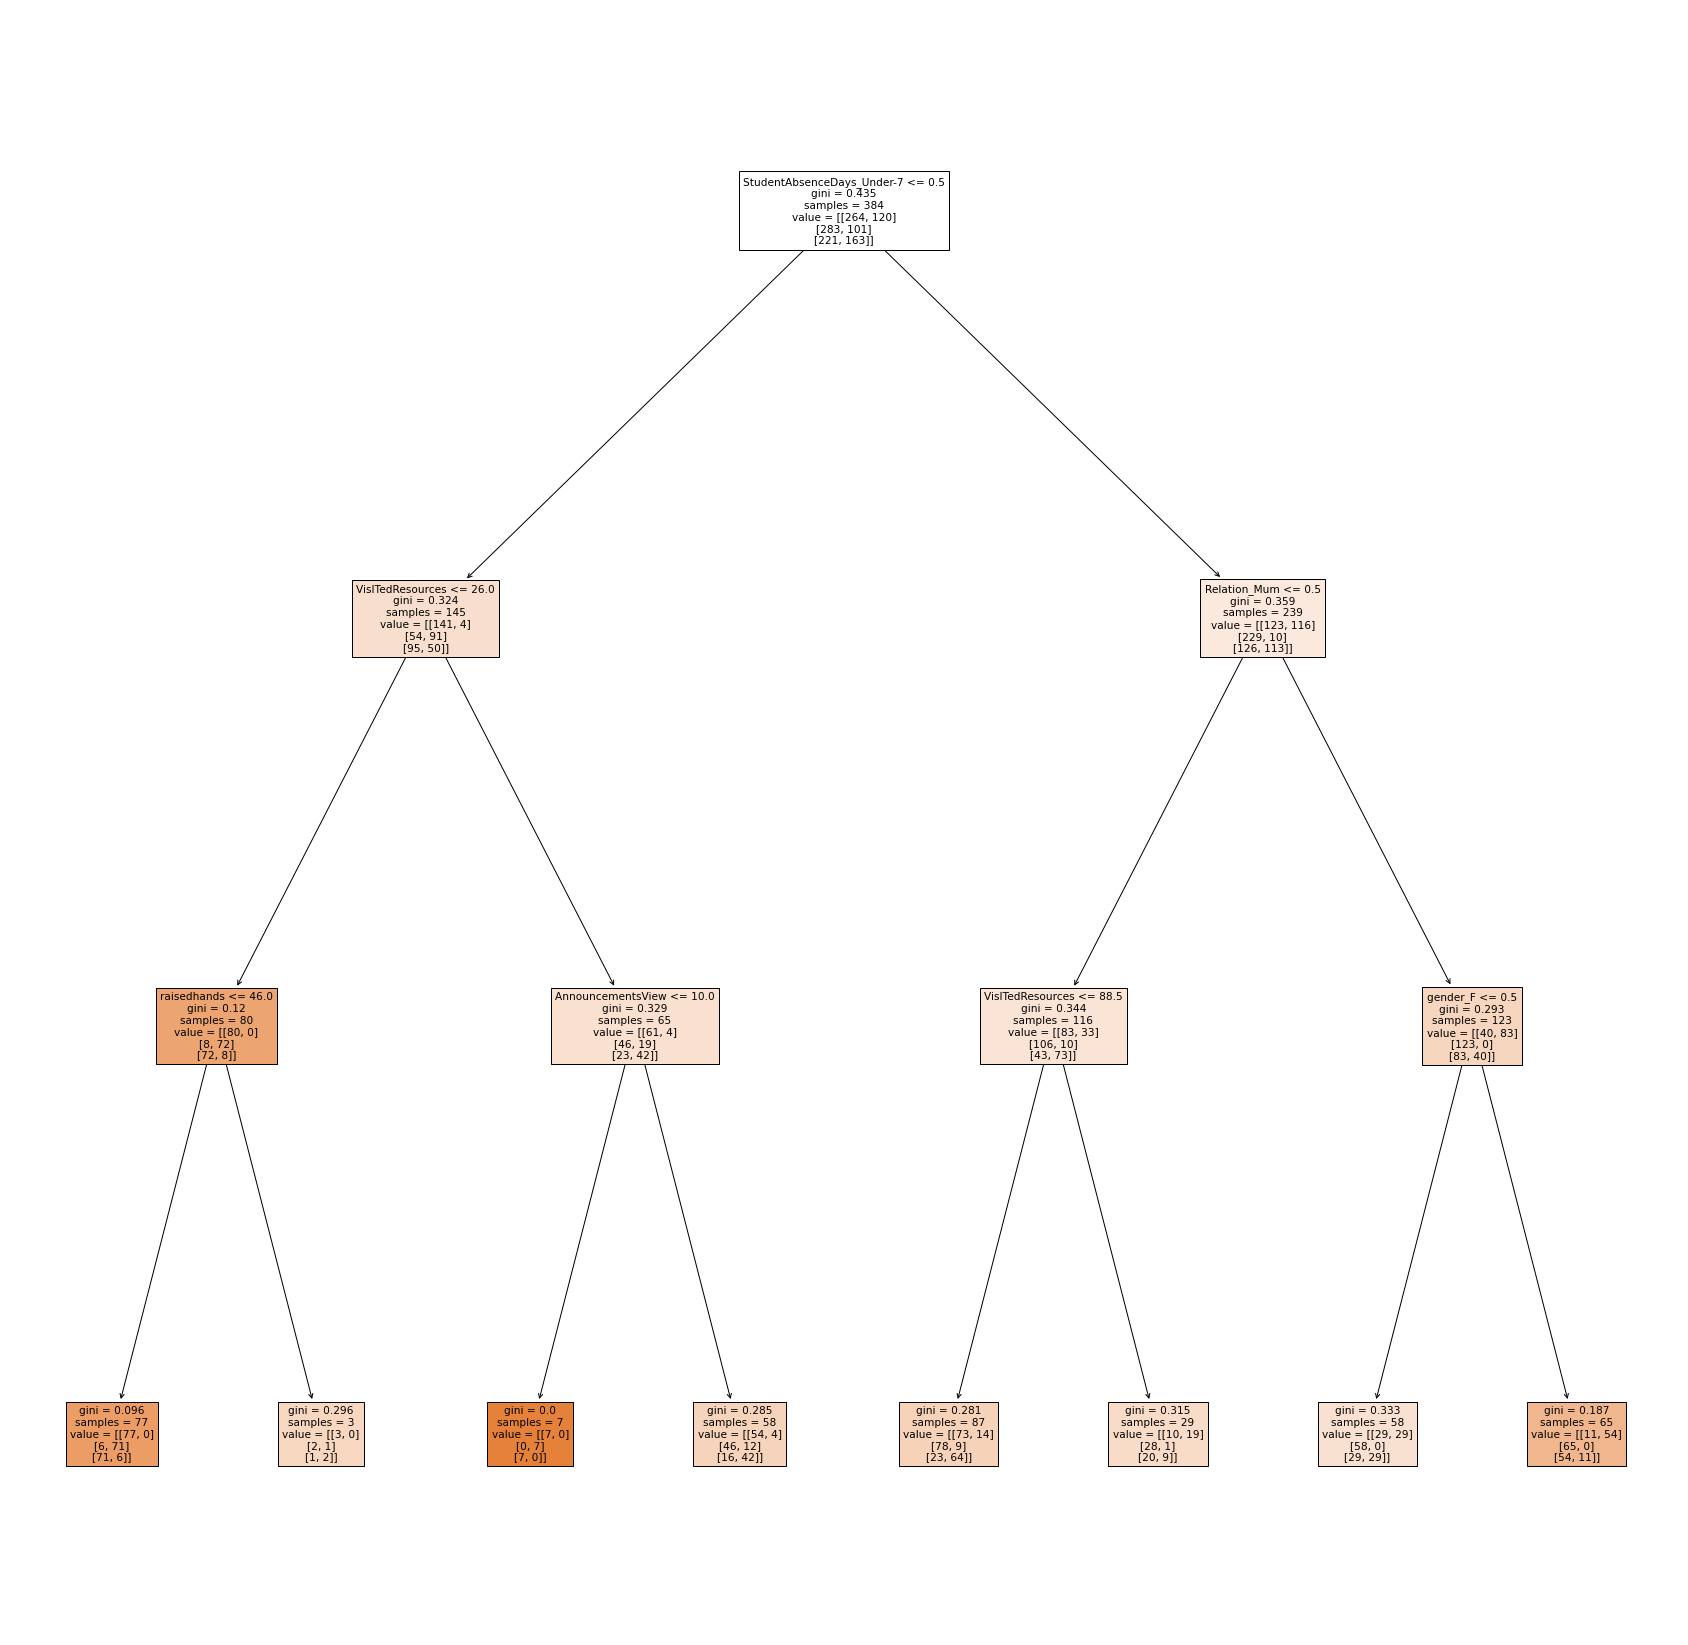

In [145]:
plt.figure(figsize=(30,30))
plot_tree(dt_dummies, feature_names=X_dummies.columns, class_names=['Class_H','Class_L','Class_M'], filled=True);


/Users/mu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


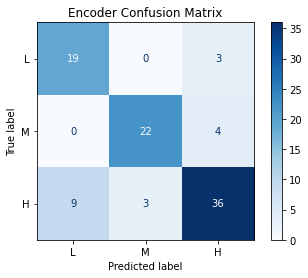

Encoder Accuracy Score: 0.75


In [153]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt_encoder, X_test_encoder, y_test_encoder,
                      display_labels=['L','M','H'], cmap= plt.cm.Blues, values_format='.0f')
plt.title('Encoder Confusion Matrix')
plt.show()
print("Encoder Accuracy Score:", accuracy)


In [169]:
plot_confusion_matrix(dt_dummies, X_test_dummies, y_test_dummies_single)



/Users/mu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

/Users/mu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


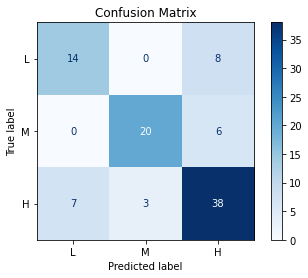

Accuracy Score: 0.75


In [51]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test, display_labels=['L', 'M', 'H'], cmap=plt.cm.Blues, values_format='.0f')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score:", accuracy)

